# Step - 1 Load Dataset

In [103]:
import seaborn as sns
import pandas as pd

In [104]:
data =  sns.load_dataset("titanic")
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [105]:
# Give details of Non-Null count and data types of each feature.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [106]:
# Sum of total missing value in each feature.
data.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [107]:
# 50% of the mark for this dataset.
# will try to drop feature which has more than 446 missing values.
0.5 * len(data)

445.5

# Step - 2 Deletion Approach

In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [109]:
# Drop rows with any missing values will end up losing valuable info.

# drop values column wise.

data.dropna(axis=1,inplace=True)

In [110]:
data.shape

(891, 11)

In [111]:
# 4 columns are dropped.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    object  
 3   sibsp       891 non-null    int64   
 4   parch       891 non-null    int64   
 5   fare        891 non-null    float64 
 6   class       891 non-null    category
 7   who         891 non-null    object  
 8   adult_male  891 non-null    bool    
 9   alive       891 non-null    object  
 10  alone       891 non-null    bool    
dtypes: bool(2), category(1), float64(1), int64(4), object(3)
memory usage: 58.6+ KB


# Step - 3 Imputation using Mean and Median

In [112]:
data =  sns.load_dataset("titanic")
data.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [113]:
# fill null values in Age column
# mean is good imputation if data is normally distributed
# otherwise it will reduce variance because all missing values
# will be replaced by same number.

data['age_mean']=data['age'].fillna(data['age'].mean())
data.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_mean
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,22.000000
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,38.000000
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,26.000000
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,35.000000
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,35.000000
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True,29.699118
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True,54.000000
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False,2.000000
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False,27.000000
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False,14.000000


In [114]:
# Median can be better replacement of mean if data is skewed.

data['age_median']=data['age'].fillna(data['age'].median())
data.head(20)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_mean,age_median
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,22.000000,22.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,38.000000,38.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,26.000000,26.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,35.000000,35.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,35.000000,35.0
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True,29.699118,28.0
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True,54.000000,54.0
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False,2.000000,2.0
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False,27.000000,27.0
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False,14.000000,14.0


In [115]:
data['embarked'].value_counts()

,count
embarked,
S,644
C,168
Q,77


In [116]:
# fill missing value of categorical data.

data['embarked_mode']=data['embarked'].fillna(data['embarked'].mode()[0])
data.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_mean,age_median,embarked_mode
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,22.000000,22.0,S
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,38.000000,38.0,C
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,26.000000,26.0,S
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,35.000000,35.0,S
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,35.000000,35.0,S
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True,29.699118,28.0,Q
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True,54.000000,54.0,S
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False,2.000000,2.0,S
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False,27.000000,27.0,S
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False,14.000000,14.0,C


In [117]:
# .mode()[0] → most frequent category (e.g., “S”).

# we can also use contant like "unknown" to fill missing values
#Constant = “Unknown” → preserves missingness information.
#Works well in categorical ML models (e.g., decision trees).

data =  sns.load_dataset("titanic")

data['embarked_constant']=data['embarked'].fillna('unknown')
data['embarked_constant'].value_counts()

,count
embarked_constant,
S,644
C,168
Q,77
unknown,2


# Step - 4 Indicator Variable

In [118]:
data=sns.load_dataset('titanic')
data['age'].isnull().sum()

np.int64(177)

In [119]:
# if age is missing replace with '1' else 0

data['age_missing']=data['age'].isnull().astype(int)

In [120]:
data[['age_missing']].value_counts()

,count
age_missing,
0,714
1,177


In [121]:
data['age_missing'].isnull().sum()

#🤙 Useful because missingness itself may be predictive
#(e.g., wealthy passengers more likely to have missing Cabin).
# Common trick in tree-based models (Random Forest, XGBoost).

np.int64(0)

# Step - 5 Compare Distributions

In [122]:
import matplotlib.pyplot as plt


In [123]:
# mean imputation
data=sns.load_dataset('titanic')

data['age_mean']=data['age'].fillna(data['age'].mean())

In [124]:


data['age_median']=data['age'].fillna(data['age'].median())

In [125]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_mean,age_median
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,22.0,22.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,38.0,38.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,26.0,26.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,35.0,35.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,35.0,35.0


# Step - 5 Compare Distributions

In [126]:
#Plots histograms of original vs imputed age.
# Helps see how mean/median imputation changes the distribution.
# Important to check bias introduced by imputation.

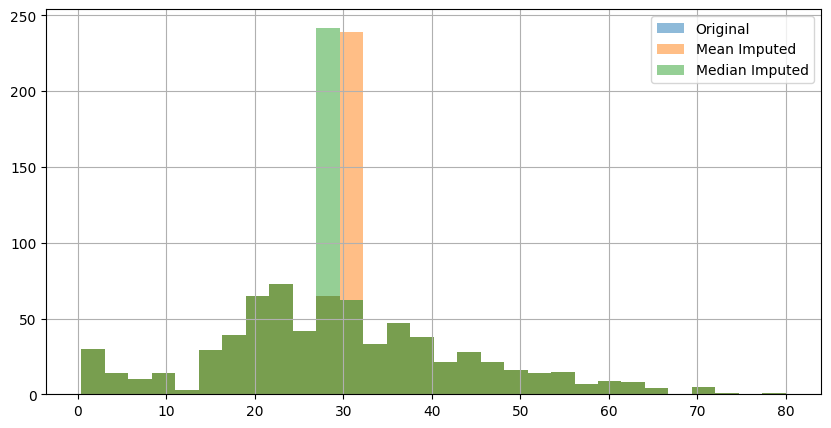

In [127]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
data['age'].hist(bins=30, alpha=0.5, label="Original")
data['age_mean'].hist(bins=30, alpha=0.5, label="Mean Imputed")
data['age_median'].hist(bins=30, alpha=0.5, label="Median Imputed")
plt.legend()
plt.show()


# Step - 6 KNN Imputer

In [128]:
data = sns.load_dataset("titanic")
data.head(30)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [129]:
data.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [130]:
from sklearn.impute import KNNImputer

# Select Numerical columns for KNN

numerical_columns = ['age','fare']

data_knn = data[numerical_columns].copy() # copy columns in another variable

In [131]:
data_knn.head()

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [132]:
# Initialize KNN imputer
import pandas as pd

knn_imputer = KNNImputer(n_neighbors=5)

# Apply imputation

data_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(data_knn),columns=numerical_columns)
data_knn_imputed

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,28.0,23.4500
889,26.0,30.0000


In [133]:
# Apply in original data

data['age_knn'] = data_knn_imputed['age']
data.head(20)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_knn
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,22.000
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,38.000
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,26.000
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,35.000
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,35.000
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True,22.684
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True,54.000
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False,2.000
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False,27.000
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False,14.000


# Step - 7 MICE(Multiple Imputation by chanined equation) Iterative Imputer

In [134]:
from sklearn.experimental import enable_iterative_imputer

# this is the must import because it's import enable the use
# of iterative imputer as its still considered an experimental
# feature of sckit-learn.

from sklearn.impute import IterativeImputer

In [135]:
# select features for regression imputation

numerical_columns= ['age','fare','pclass']

data_iterative = data[numerical_columns].copy()
data_iterative

,age,fare,pclass
0,22.0,7.2500,3
1,38.0,71.2833,1
2,26.0,7.9250,3
3,35.0,53.1000,1
4,35.0,8.0500,3
...,...,...,...
886,27.0,13.0000,2
887,19.0,30.0000,1
888,NaN,23.4500,3
889,26.0,30.0000,1


In [136]:
# Apply MICE
import pandas as pd

data_iterative_imputer = IterativeImputer(max_iter=20,random_state=42)

# Apply Imputation

data_iter_imputer = pd.DataFrame(data_iterative_imputer.fit_transform(data_iterative),columns = numerical_columns)

In [137]:
# Add in original dataframe

data['age_imputer']=data_iter_imputer['age']
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_knn,age_imputer
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,22.0,22.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,38.0,38.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,26.0,26.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,35.0,35.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,35.0,35.0


In [138]:
# Mean imputation

data['age_mean'] = data['age'].fillna(data['age'].mean())
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_knn,age_imputer,age_mean
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,22.0,22.0,22.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,38.0,38.0,38.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,26.0,26.0,26.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,35.0,35.0,35.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,35.0,35.0,35.0


In [139]:
# Mean imputation

data['age_median'] = data['age'].fillna(data['age'].median())
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_knn,age_imputer,age_mean,age_median
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,22.0,22.0,22.0,22.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,38.0,38.0,38.0,38.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,26.0,26.0,26.0,26.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,35.0,35.0,35.0,35.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,35.0,35.0,35.0,35.0


In [143]:
# Mode imputation

data['embarked_mode'] = data['embarked'].fillna(data['embarked'].mode()[0])
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_knn,age_imputer,age_mean,age_median,embarked_mode
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,22.0,22.0,22.0,22.0,S
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,38.0,38.0,38.0,38.0,C
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,26.0,26.0,26.0,26.0,S
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,35.0,35.0,35.0,35.0,S
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,35.0,35.0,35.0,35.0,S


# Step - 8 Compare All Distributions

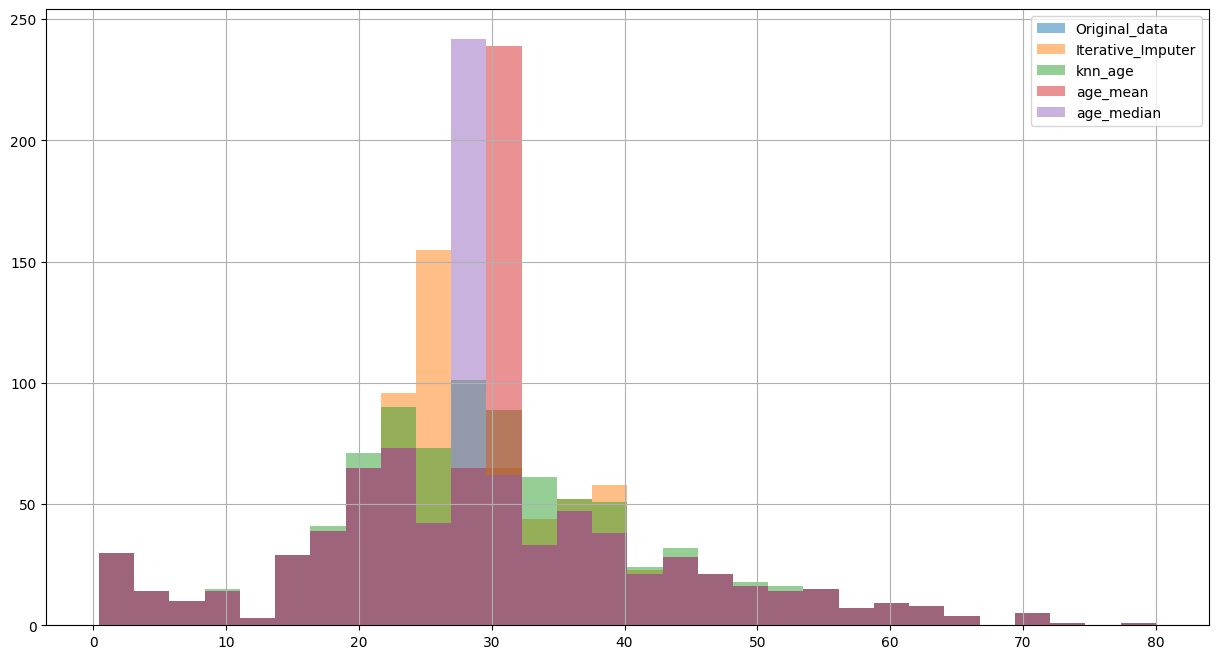

In [141]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))

data['age'].hist(bins=30,alpha=0.5,label='Original_data')
data['age_imputer'].hist(bins=30,alpha=0.5,label='Iterative_Imputer')
data['age_knn'].hist(bins=30,alpha=0.5,label='knn_age')
data['age_mean'].hist(bins=30,alpha=0.5,label='age_mean')
data['age_median'].hist(bins=30,alpha=0.5,label='age_median')


plt.legend()
plt.show()

In [155]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

results = {}

for method in ['age_mean', 'age_median', 'age_knn', 'age_imputer']:
    data_model = data.dropna(subset=['survived']).copy()
    data_model['age'] = data_model[method]
    data_model['embarked'] = data_model['embarked_mode']
    data_model['sex'] = data_model['sex'].map({'male':0, 'female':1})

    X = data_model[['age','sex','fare']]
    y = data_model['survived']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LogisticRegression(max_iter=500)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results[method] = accuracy_score(y_test, y_pred)

print("Accuracy Comparison:")

print("\n")

# convert dictionary to list
ls ={key:[value] for key,value in results.items()}
print(ls)

print("\n")

print(pd.DataFrame(ls))


Accuracy Comparison:


{'age_mean': [0.776536312849162], 'age_median': [0.776536312849162], 'age_knn': [0.776536312849162], 'age_imputer': [0.776536312849162]}


   age_mean  age_median   age_knn  age_imputer
0  0.776536    0.776536  0.776536     0.776536
